In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [91]:
df = pd.read_csv("../dados/himmelblau_log.csv")

In [92]:
X = df[['x0', 'x1']]
y = df['y']

In [140]:
from sklearn.tree import DecisionTreeRegressor, plot_tree, export_graphviz
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [93]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=13, test_size=0.3)

In [94]:
for depth in range(2,26):
    model = DecisionTreeRegressor(max_depth=depth, min_samples_leaf=2)
    model.fit(X_train, y_train)

    y_pred_test = model.predict(X_test)
    y_pred_train = model.predict(X_train)

    mae_test = mean_absolute_error(y_test, y_pred_test)
    mae_train = mean_absolute_error(y_train, y_pred_train)

    # print(f"{depth}: MAE (train) = ", mae_train)
    print(f"{depth}: MAE (test/train) = ", mae_test, mae_train)

2: MAE (test/train) =  0.6577511593429533 0.644401073354526
3: MAE (test/train) =  0.5666683216287758 0.5706139926522675
4: MAE (test/train) =  0.4615977036516644 0.45703047251257356
5: MAE (test/train) =  0.4211001133339669 0.3904860321701593
6: MAE (test/train) =  0.33692093280178315 0.29250233532304226
7: MAE (test/train) =  0.30168652286510894 0.23154059235785782
8: MAE (test/train) =  0.2861530878014118 0.1852380966053715
9: MAE (test/train) =  0.2506354814655174 0.14827945263313397
10: MAE (test/train) =  0.2505168132397406 0.13824521862102343
11: MAE (test/train) =  0.2527814143909144 0.12567047608383575
12: MAE (test/train) =  0.24371383144639822 0.11899955270439665
13: MAE (test/train) =  0.24795198650625194 0.11758956849593868
14: MAE (test/train) =  0.24785305526979612 0.11712300952196215
15: MAE (test/train) =  0.2490686164693724 0.11689334642194836
16: MAE (test/train) =  0.24943173798525933 0.11689334642194836
17: MAE (test/train) =  0.24742530924489425 0.1168933464219483

In [112]:
best_params = {'max_depth': 9,
 'min_samples_split': 7,
 'min_samples_leaf': 3,
 'max_leaf_nodes': 49}

In [113]:
model = DecisionTreeRegressor(**best_params)
model.fit(X_train, y_train)

y_pred_test = model.predict(X_test)
y_pred_train = model.predict(X_train)

mae_test = mean_absolute_error(y_test, y_pred_test)
mae_train = mean_absolute_error(y_train, y_pred_train)

print(f"MAE (train) = {mae_train:.4f}")
print(f"MAE (test) = {mae_test:.4f}")

MAE (train) = 0.2097
MAE (test) = 0.2749


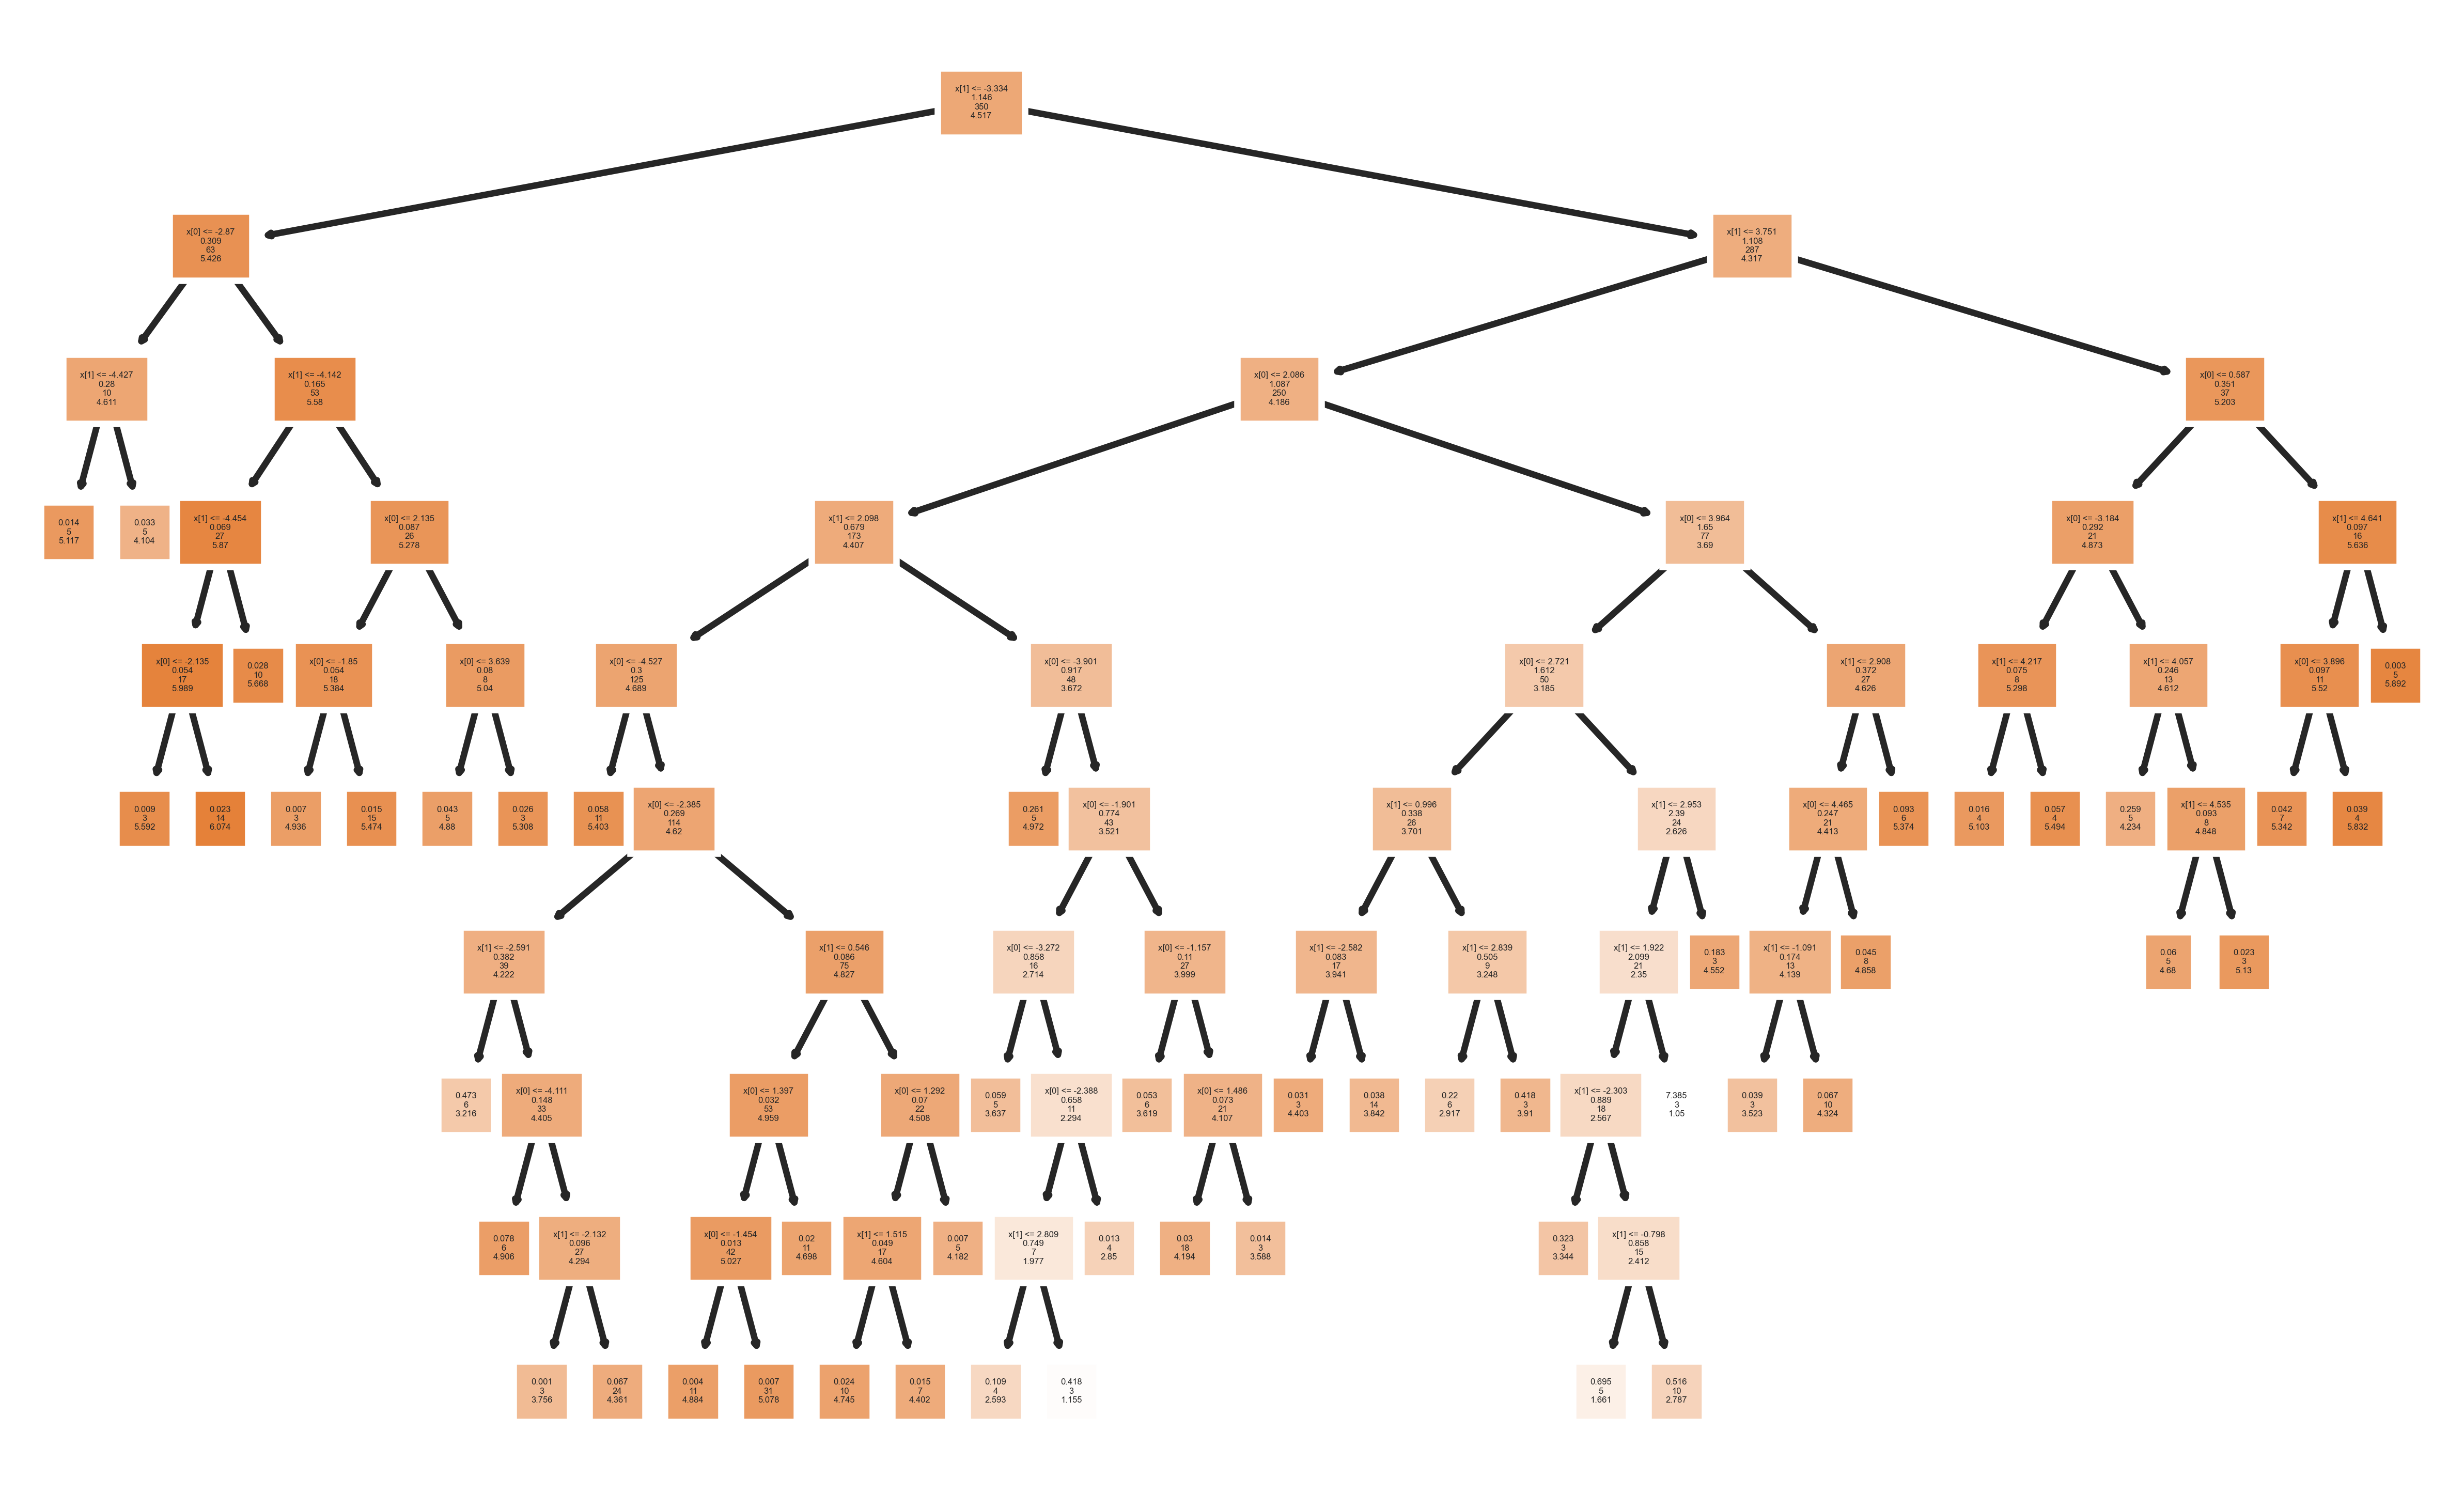

In [138]:
fig = plt.figure(figsize=(10,6), dpi=600)
plot_tree(model, filled=True, fontsize=2, label='none')
plt.savefig('decision_tree_regression_plt.png', dpi=600, format='png', bbox_inches='tight', transparent=False)
plt.show()

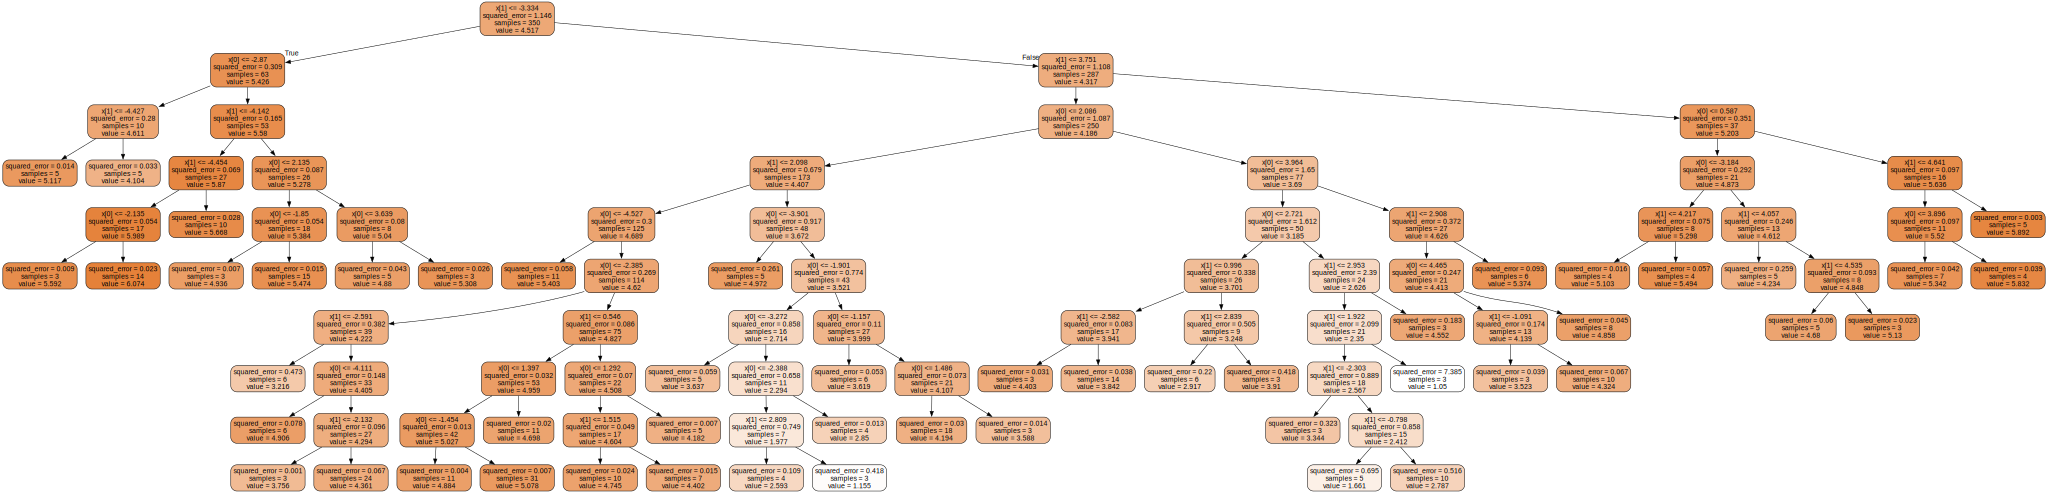

In [142]:
import graphviz

dot_data = export_graphviz(
    model,
    filled=True,
    rounded=True
)

graph = graphviz.Source(dot_data)
graph

In [82]:
from sklearn.inspection import DecisionBoundaryDisplay

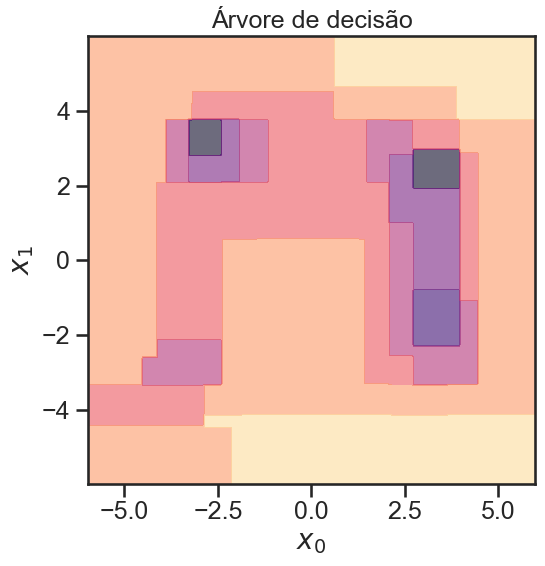

In [130]:
boundary = DecisionBoundaryDisplay.from_estimator(model, X, grid_resolution=300, cmap=plt.cm.magma, alpha=0.6)

boundary.ax_.set_box_aspect(aspect=1)

boundary.ax_.scatter(X.iloc[:,0], X.iloc[:,1], c=y, edgecolor="black", cmap=plt.cm.magma, s=80)


boundary.ax_.set_xlabel("$x_0$", fontsize=20)
boundary.ax_.set_ylabel("$x_1$", fontsize=20)
boundary.ax_.tick_params(axis='both', which='major', labelsize=18)
boundary.ax_.set_title("Árvore de decisão", fontsize=18)

fig = plt.gcf()
fig.set_size_inches(6, 6)
plt.tight_layout()
plt.gca().set_aspect(1)
plt.savefig('decision_tree_regression_boundary.png', dpi=600, format='png', bbox_inches='tight', transparent=False)
plt.show()

/Users/leseixas/intelligible/lib/python3.8/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names


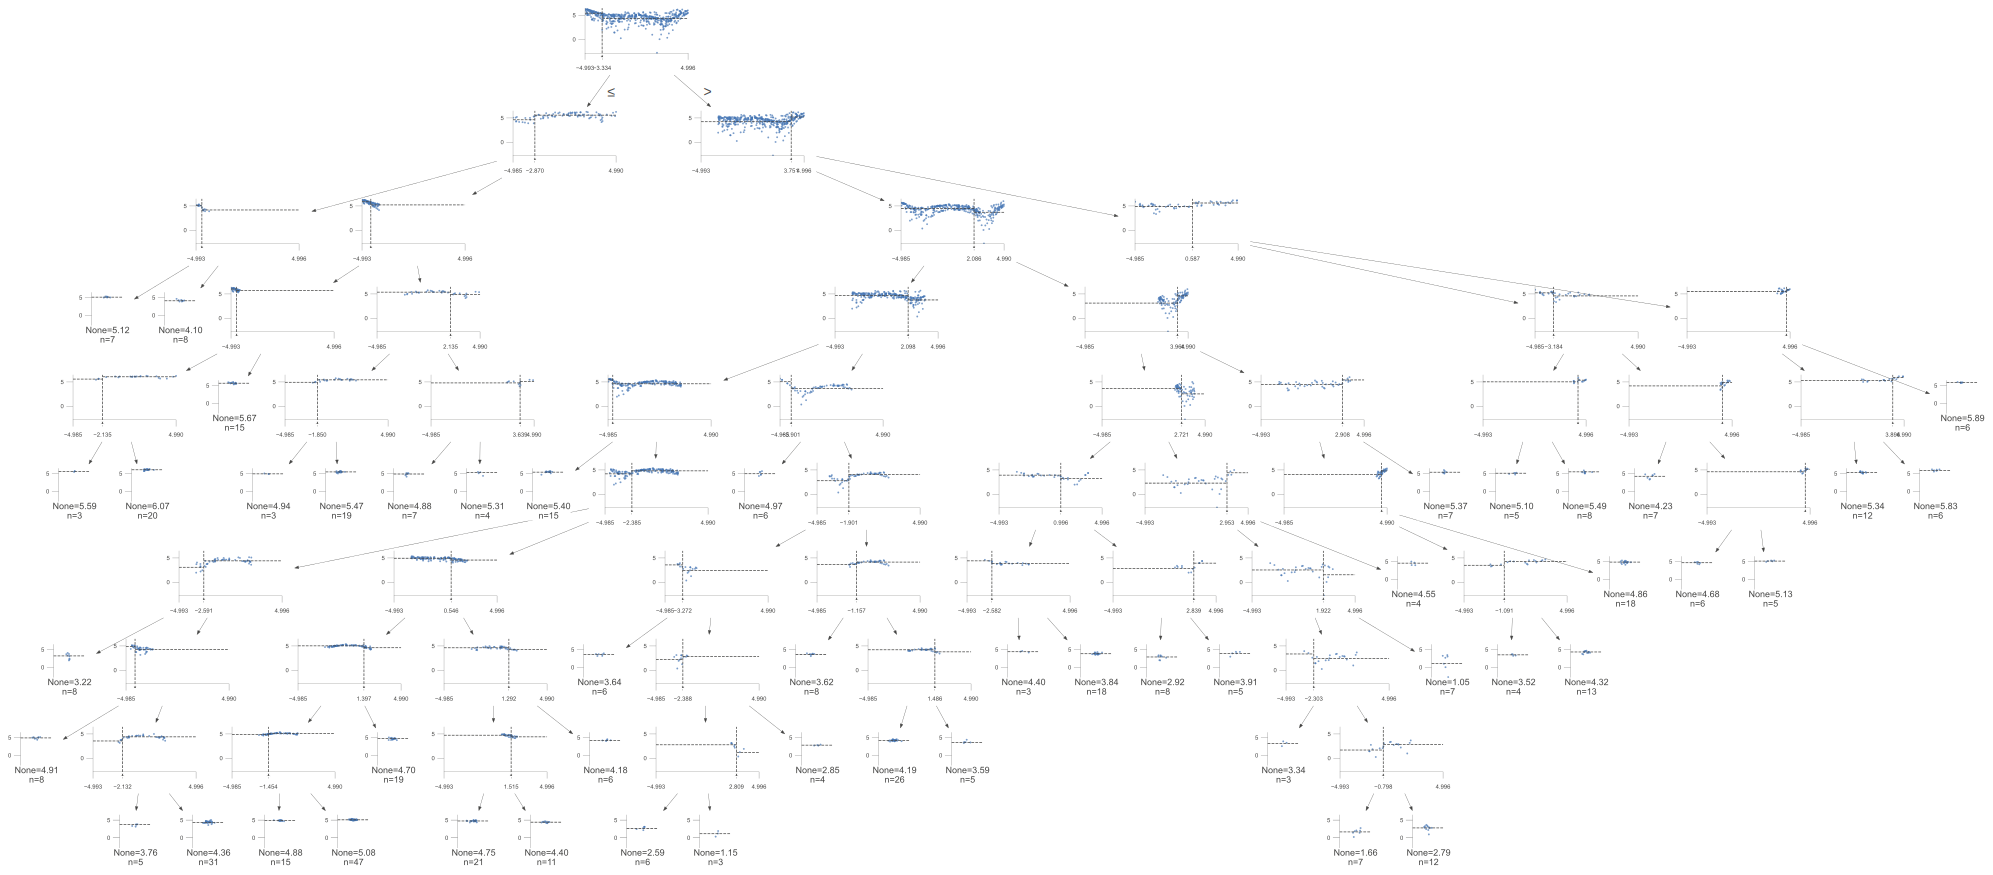

In [134]:
import dtreeviz

viz_model = dtreeviz.model(model, X.values, y.values) # target_name='Classes', class_names=['0', '1'], feature_names=['x0', 'x1']

viz_model.view(scale=1.0) # colors={'classes': [None, None, ['#377eb8', '#e41a1c']]}

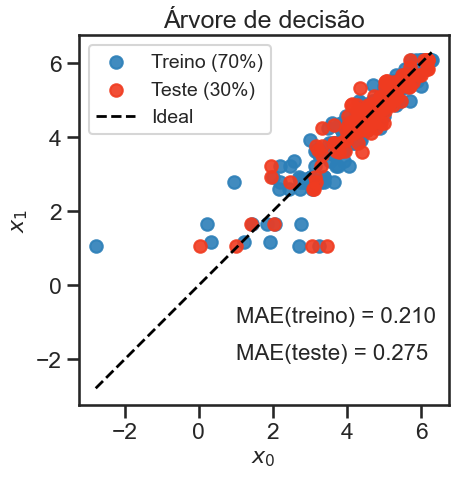

In [127]:
import seaborn as sns
sns.set_theme(style='ticks', context='talk')
plt.scatter(y_train, y_pred_train, label='Treino (70%)', alpha=0.9, color='#2c7fb8')
plt.scatter(y_test, y_pred_test, label='Teste (30%)', alpha=0.9, color='#f03b20')

# Plot the 45-degree line (line with angular coefficient of 1)
x_line = np.linspace(min(y_train), max(y_train), 100)
plt.plot(x_line, x_line, color='black', linestyle='--', linewidth=2, label='Ideal')

plt.xlabel("$x_0$", fontsize=16)
plt.ylabel("$x_1$", fontsize=16)
plt.legend(fontsize=14)
plt.text(1,-1,f"MAE(treino) = {mae_train:.3f}", fontsize=16)
plt.text(1,-2,f"MAE(teste) = {mae_test:.3f}", fontsize=16)
plt.title("Árvore de decisão", fontsize=18)
plt.gca().set_aspect(1)
plt.savefig('decision_tree_regression.png', dpi=600, format='png', bbox_inches='tight', transparent=False)
plt.show()

In [110]:
import optuna
from sklearn.tree import DecisionTreeRegressor

def objective(trial):
    param = {
        'max_depth': trial.suggest_int('max_depth', 5, 20),
        'min_samples_split': trial.suggest_int('min_samples_split', 3, 10),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 3, 10),
        'max_leaf_nodes': trial.suggest_int('max_leaf_nodes', 10, 50)
    }
    
    model = DecisionTreeRegressor(**param) # device='cuda'
    model.fit(X_train, y_train)

    y_pred_test = model.predict(X_test)
    return mean_absolute_error(y_test, y_pred_test)

# Create a study objetive and optimize the objective function
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=200)

best_params = study.best_params
print('Best parameters:', best_params)

[I 2024-03-09 09:36:01,500] A new study created in memory with name: no-name-a7db0562-b666-40fb-a2c3-227cbec0883b
[I 2024-03-09 09:36:01,541] Trial 0 finished with value: 0.33091705620756384 and parameters: {'max_depth': 16, 'min_samples_split': 5, 'min_samples_leaf': 9, 'max_leaf_nodes': 31}. Best is trial 0 with value: 0.33091705620756384.


[I 2024-03-09 09:36:01,559] Trial 1 finished with value: 0.46727402586984207 and parameters: {'max_depth': 18, 'min_samples_split': 3, 'min_samples_leaf': 4, 'max_leaf_nodes': 15}. Best is trial 0 with value: 0.33091705620756384.
[I 2024-03-09 09:36:01,575] Trial 2 finished with value: 0.3942172106201007 and parameters: {'max_depth': 14, 'min_samples_split': 9, 'min_samples_leaf': 4, 'max_leaf_nodes': 28}. Best is trial 0 with value: 0.33091705620756384.
[I 2024-03-09 09:36:01,610] Trial 3 finished with value: 0.33673610330351506 and parameters: {'max_depth': 18, 'min_samples_split': 9, 'min_samples_leaf': 7, 'max_leaf_nodes': 31}. Best is trial 0 with value: 0.33091705620756384.
[I 2024-03-09 09:36:01,632] Trial 4 finished with value: 0.346902326938901 and parameters: {'max_depth': 20, 'min_samples_split': 3, 'min_samples_leaf': 9, 'max_leaf_nodes': 24}. Best is trial 0 with value: 0.33091705620756384.
[I 2024-03-09 09:36:01,659] Trial 5 finished with value: 0.340146471218057 and para

Best parameters: {'max_depth': 9, 'min_samples_split': 7, 'min_samples_leaf': 3, 'max_leaf_nodes': 49}


In [111]:
best_params

{'max_depth': 9,
 'min_samples_split': 7,
 'min_samples_leaf': 3,
 'max_leaf_nodes': 49}